## [153. Find Minimum in Rotated Sorted Array](https://leetcode.com/problems/find-minimum-in-rotated-sorted-array/)

问题难度: &clubs; &clubs; &clubs;

### 问题描述

假设一个升序排列的数组在一些预先不知道的轴点进行了交换, (例如`[0,1,2,4,5,6,7]`变成了`[4,5,6,7,0,1,2]`), 找到最小的元素.

可以假设数组中不存在重复的元素.

**示例1**
```
Input: [3,4,5,1,2] 
Output: 1
```

**示例2**
```
Input: [4,5,6,7,0,1,2]
Output: 0
```

### 解题思路

o(╯□╰)o 最简单粗暴的方法当然是全部遍历一遍啦~~~ 但是, 时间复杂度为`O(N)`, 显然有点高.

考虑到部分数组是有序的, 因此可以考虑使用**二分搜索**算法. 在二分搜索中, 我们找到中间的点, 然后基于一些条件决定向左检索或者向右检索.由于给定的数组是排好序的, 我们可以使用二分搜索. 但是由于数组被旋转了, 因此在这里不能简单地只使用二分搜索.

在这个问题中, 我们将会运用一个二分搜索的修改版, 与标准二分搜索的不同之处在于决定搜索方向的*条件*.

我们想找到一个旋转排序数组中的最小元素. 那么在数组没被旋转的情况呢? 我们如何检查呢?

如果数组未被旋转并且数组升序排列, 那么`last element > first element`.

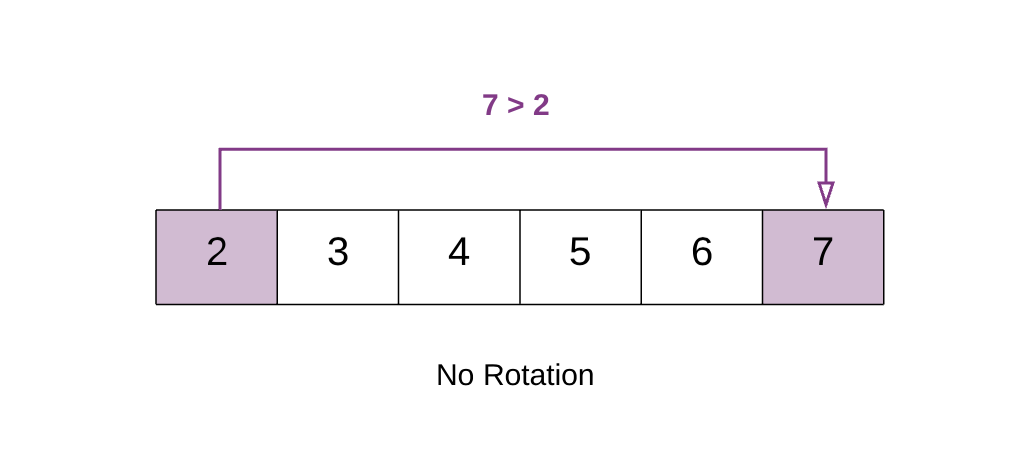
在上面的示例中, `7 > 2`. 这就意味着数组已经排好序和没有旋转.

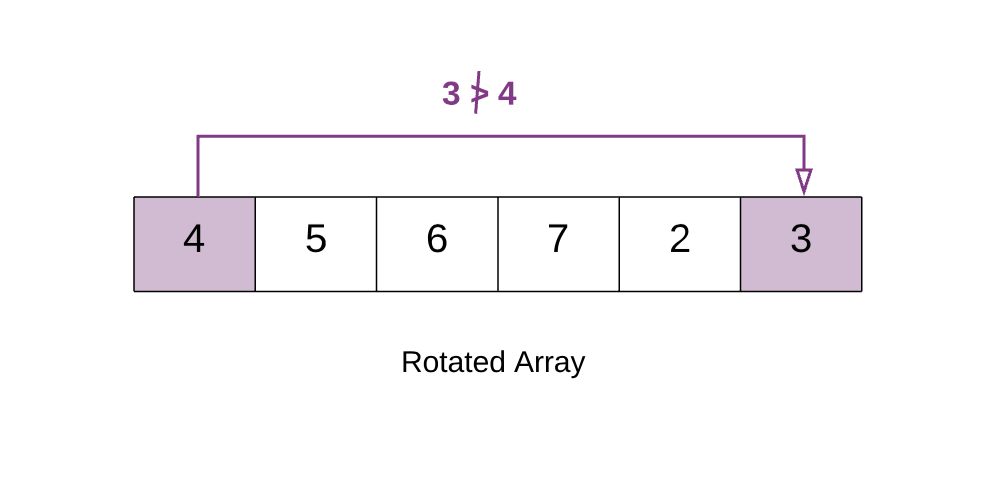
在上面的示例中, `3<4`. 因此数组是旋转的. 由于数组初始化是`[2, 3 ,4 ,5 ,6 ,7]`, 但是旋转之后, 较小的元素`[2,3]`到了后面, 形成了`[4, 5, 6, 7, 2, 3]`. 由于旋转后数组中的第一个元素`[4]`大于最后的元素.

这就意味着数组中有一个点, 能够发现变化. 这是一个可以帮助我们解决问题的点. 我们将其称为`Inflection Point`.

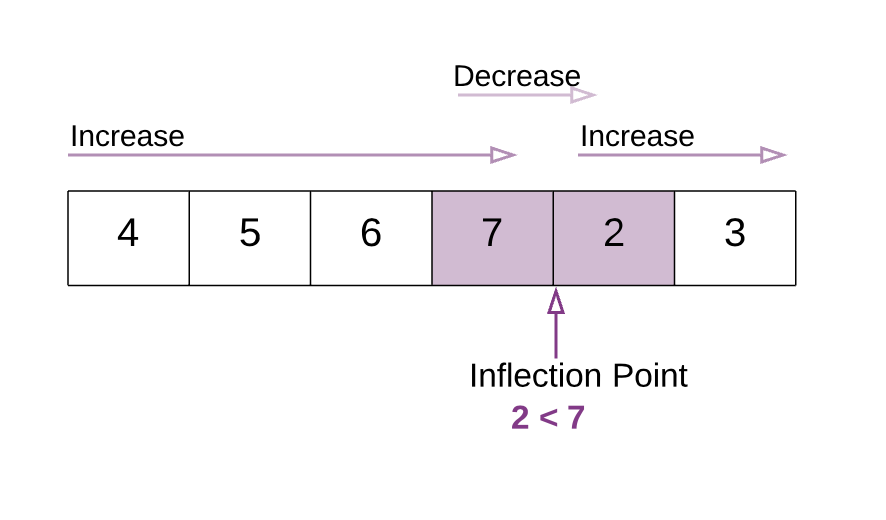
在改进版的二分搜索算法中, 我们需要寻找这个点. 在上面的示例中, 注意到`Inflection Point`:

- 转折点左边的所有元素都大于数组的第一个元素
- 转折点右边的所有元素都小于数组的第一个元素

**算法**

- 找到数组的`mid`元素
- 如果`mid`元素大于`first`元素, 这就意味着我们需要在`mid`的右边找转折点
- 如果`mid`元素小于`first`元素, 这就意味着我们需要在`mid`的左边找转折点

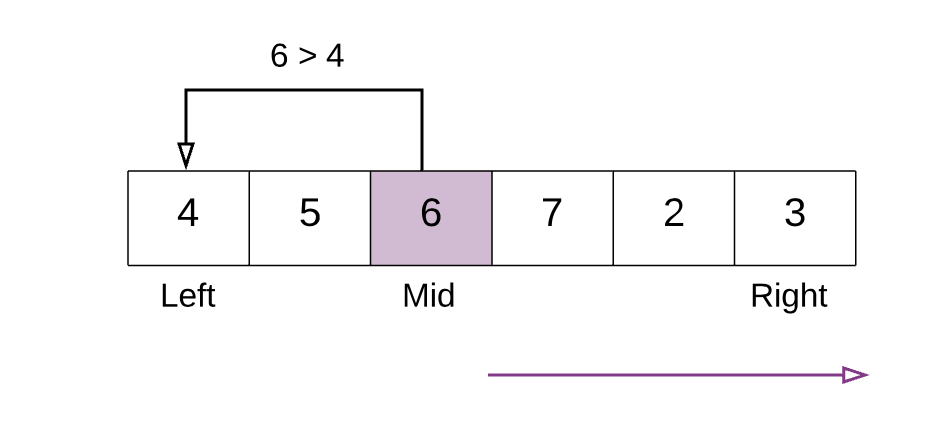
在上面的例子中, 中间元素`6`大于第一个元素`4`, 因此, 我们应该从`mid`的右边开始继续检索转折点.
- 当满足下面任一条件时, 就可以停止寻找转折点了:
    - `nums[mid] > nums[mid+1]`时, `mid+1`为最小值
    - `nums[mid-1] > nums[mid]`时, `mid`是最大值
    
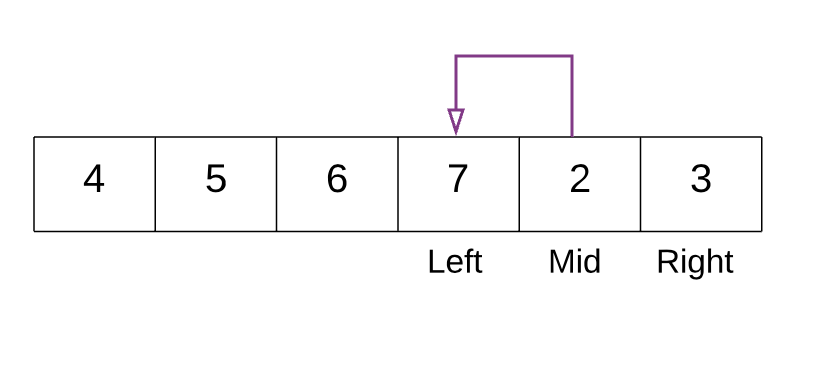
在上面的示例中, 找到`left`和`right`指针之后, `mid`元素是`2`. `2`之前的元素是`7`, 然后`7>2`, 满足`nums[mid-1] > nums[mid]`. 因此, 我们就找到转折点了, `2`就是最小的元素

### 代码

In [5]:
class Solution(object):
    def findMin(self, nums):
        """
        :type nums: List[int]
        :rtype: int
        """
        if len(nums) == 1:
            return nums[0]
        left, right = 0, len(nums) - 1
        # 如果最后一个数大于第一个数, 表明是已经排好序,无旋转的数组
        if nums[0] < nums[right]:
            return nums[0]
        while right >= left:
            mid = (left+right) // 2
            # 先判断是否已经满足轴点
            if nums[mid] > nums[mid+1]:
                return nums[mid+1]
            if nums[mid] < nums[mid-1]:
                return nums[mid]
            if nums[mid] > nums[0]:
                left = mid + 1
            else:
                right = mid - 1    

In [6]:
s = Solution()
nums = [3,4,5,1,2]
print(s.findMin(nums))
nums = [4,5,6,7,0,1,2]
print(s.findMin(nums))

1
0


## [154. Find Minimum in Rotated Sorted Array II](https://leetcode.com/problems/find-minimum-in-rotated-sorted-array-ii/)

问题难度: &clubs; &clubs; &clubs; &clubs; &clubs;

### 问题描述

假设一个升序排列的数组在一些预先不知道的轴点进行了交换, (例如`[0,1,2,4,5,6,7]`变成了`[4,5,6,7,0,1,2]`), 找到最小的元素.

数组中可能存在重复的元素.

**示例1**
```
Input: [1,3,5]
Output: 1
```

**示例2**
```
Input: [2,2,2,0,1]
Output: 0
```

**注意:**
- 这是上一个问题的延伸
- 可能存在重复元素是否会影响运行的时间复杂度?如何影响和为什么?

### 解题思路

这一题是上一题的延伸, 不过区别在于: 如果`first`/`mid`以及`last`都相等的时候, 就没办法进行排除了, 这个时候只需要向左移动一位即可, 不会影响最终的结果.

存在重复元素的话, 导致算法的时间复杂度可能从`O(log n)`增加到`O(n)`.

### 代码


In [11]:
class Solution(object):
    def findMin(self, nums):
        """
        :type nums: List[int]
        :rtype: int
        """
        if len(nums) == 1:
            return nums[0]
        left, right = 0, len(nums) - 1
        res = nums[0]
        while left < right - 1:
            mid = (left + right) // 2
            if nums[mid] > nums[left]:
                #在右边或者当前值
                res = nums[left] if nums[left] < res else res
                left = mid + 1
            elif nums[mid] < nums[left]:
                #在左边或者当前值
                res = nums[right] if nums[right] < res else res
                right = mid
            else:
                left += 1
        res = nums[left] if nums[left] < res else res
        res = nums[right] if nums[right] < res else res
        return res

In [12]:
s = Solution()
nums = [1,3,5]
print(s.findMin(nums))
nums = [2,2,2,0,1]
print(s.findMin(nums))

1
0


## [155. Min Stack](https://leetcode.com/problems/min-stack/)

问题难度: &clubs;

### 问题描述

设计一个栈, 能够在常数时间内支持`push`,`pop`,`top`以及检索最小元素.

- `push(x)` -- 将元素`x` `push`到栈中
- `pop()` --删除栈顶的元素
- `top()` --获取栈顶的元素
- `getMin()` --检索栈中最小的元素

**示例**
```
MinStack minStack = new MinStack();
minStack.push(-2);
minStack.push(0);
minStack.push(-3);
minStack.getMin();   --> Returns -3.
minStack.pop();
minStack.top();      --> Returns 0.
minStack.getMin();   --> Returns -2.
```

### 解题思路

这道题目的重点是**常数时间**, 如果用到各种乱七八糟的排序算法的话, 是无法满足时间要求的. 在资料上看到一种解法: 存储一个栈和`min`值,每次`push`时存储`x-min`的值, 然后判断`x`和`min`的大小比较; `pop`的时候可能会需要更新`min`的值, 当尾部值小于`0`时, 说明当前`pop`出去的是最小值, 这个时候只需要将`min`更新为`min-pop`就可以更新当前最小的`min`值了.


### 代码

In [14]:
class MinStack(object):

    def __init__(self):
        """
        initialize your data structure here.
        """
        self.stack = []

    def push(self, x):
        """
        :type x: int
        :rtype: void
        """
        if len(self.stack) == 0:
            self.stack.append(0)
            self.min = x
        else:
            self.stack.append(x-self.min)
            # 更新最小值
            self.min = x if x < self.min else self.min
        
    def pop(self):
        """
        :rtype: void
        """
        if len(self.stack) > 0:
            pop = self.stack.pop()
            if pop < 0:
                #需要更新min的值
                self.min -= pop
                
    def top(self):
        """
        :rtype: int
        """
        if len(self.stack) > 0:
            peak = self.stack[-1]
            if peak > 0:
                return self.min + peak
            else:
                return self.min

    def getMin(self):
        """
        :rtype: int
        """
        return self.min

# Your MinStack object will be instantiated and called as such:
# obj = MinStack()
# obj.push(x)
# obj.pop()
# param_3 = obj.top()
# param_4 = obj.getMin()

## [156. Binary Tree Upside Down](https://leetcode.com/problems/binary-tree-upside-down/)

问题难度: &clubs; &clubs; &clubs;

### 问题描述

给定一个二叉树, 所有右边的节点要么就是一个有兄弟的叶子节点(左节点与其共享相同的父节点)或者空, 将其上下颠倒并且将其右节点转化为左叶子节点, 返回新的根节点.

例如, 给定一个二叉树`{1,2,3,4,5}`:
```
  1
 / \
 2 3
/ \
4 5
```

返回二叉树的根节点`[4,5,2,#,#,3,1]`:
```
   4
  / \
 5  2
   / \
   3  1
```

### 解题思路

递归法: 针对每个节点, 将左子树进行颠倒, 将左子树作为父节点, 将原来的根节点作为父节点的右节点, 将原来的右节点作为父节点的左节点.

迭代法: 从上到小进行颠倒, 针对当前根节点, 将其变为右节点, 然后当前右节点, 将其变成左节点, 然后再向上迭代. 分别使用四个指针指向不同的变量, - `node`: 标识当前节点, `pre`标识当前节点, 也就是下一轮将作为右节点的节点, `next`标识当前节点的左节点, 也就是下一轮作为根节点.


### 代码

In [5]:
class Solution(object):
    
    def upsideDownBinaryTree(self, root):
        """
        :type root: ListNode
        :rtype: nothing
        """
        if root is None:
            return root
        parent, left, right = root, root.left, root,right
        if left is not None:
            ret = upsideDownBinaryTree(left)
            left.left = right
            left.right = parent
            return ret
        return root
    
    def upsideDownBinaryTreeIter(self, root):
        """
        :type root: ListNode
        :rtype: nothing
        """
        node, pre, next, tmp = root, None, None, None
        while node is not None:
            next = root.left
            node.left = tmp
            tmp = node.right
            pre = cur
            cur = next
        return pre
            

## [157. Read N Characters Given Read4](https://leetcode.com/problems/read-n-characters-given-read4/)

问题难度: &clubs;

### 问题描述

`API`: `int read4(char *buf)`每次都会从一个文件中读取`4`个字符.

返回值为真实的字符读取数. 例如, 如果文件中只有`3`个字符, 那么它会返回`3`.

通过使用`read4`的`API`, 实现一个函数`int read4(char *buf, int n)`能够从文件中读取`n`个字符.

**注意:**
读取函数在每个测试示例中只会被调用`1`次.


### 解题思路

开始的时候没太弄明白题目的意思, 后来看了看, 其实是需要使用`read4`来读取`n`个字符串, 然后返回的是读取的数目, 当`n`大于`list`的数目时, 直接返回`n`即可, 但是当`n`小于`list`时, 应该返回`list`的数目.


### 代码

In [3]:
# The read4 API is already defined for you.
# @param buf, a list of characters
# @return an integer
# def read4(buf):

class Solution(object):
    def read(self, buf, n):
        """
        :type buf: Destination buffer (List[str])
        :type n: Maximum number of characters to read (int)
        :rtype: The number of characters read (int)
        """
        res = 0
        while res <= n:
            buf4 = [""] * 4
            cur = read4(buf)
            cur = res if res < cur else cur
            for i in range(cur):
                buf[res] = buf4[i]
                res += 1
            if cur != 4:
                return res
            n -= cur
        return n

## [158. Read N Characters Given Read4 II - Call multiple times](https://leetcode.com/problems/read-n-characters-given-read4-ii-call-multiple-times)

问题难度: &clubs; &clubs; &clubs; &clubs; &clubs;

### 问题描述


`API`: `int read4(char *buf)`每次都会从一个文件中读取`4`个字符.

返回值为真实的字符读取数. 例如, 如果文件中只有`3`个字符, 那么它会返回`3`.

通过使用`read4`的`API`, 实现一个函数`int read4(char *buf, int n)`能够从文件中读取`n`个字符.

**注意:**
读取函数可能会被调用多次.

### 解题思路

多次读与一次读的主要不同在于`read4()`函数中的`buf`相当于全局的，每次`read()`的时候前面`read4()`里读进`buf`的剩下来字符的还要继续用，不够才又调用`read4()`往`buf`里新增加内容供`read`读取.

分别使用一个队列和一个变量来标识文件是否已经到末尾.

### 代码

In [4]:
# The read4 API is already defined for you.
# @param buf, a list of characters
# @return an integer
# def read4(buf):

class Solution(object):
    queue_list = []
    endOfFile = False
    
    def read(self, buf, n):
        """
        :type buf: Destination buffer (List[str])
        :type n: Maximum number of characters to read (int)
        :rtype: The number of characters read (int)
        """
        total = 0
        while len(self.queue_list) < n and not self.endOfFile:
            buf4 = [""] * 4
            cur = read4(buf)
            if cur < 4:
                self.endOfFile = True
            for i in range(cur):
                self.queue_list.append(buf4[i])
        min_num = len(self.queue_list) if len(self.queue_list) < n else n
        for i in range(min_num):
            buf[i] = self.queue_list[i]
            total += 1
        return total 

## [159. Longest Substring with At Most Two Distinct Characters](https://leetcode.com/problems/longest-substring-with-at-most-two-distinct-characters)

问题难度: &clubs; &clubs; &clubs; &clubs; &clubs;

### 问题描述

给定一个字符串,  找到至多包含两个相同字符的最长子串.
例如:
给定`S = “eceba”`, 得到的`T`为`ece`, 其长度为`3`.

### 解题思路

使用一个哈希表来存储当前已有的字符, 及其出现的次数, 例如, 针对`S="eceba"`, 计算过程如下:

- 初始化`char_dict = dict(), left = 0`
- 遍历字符串`S`, 对于每个字符`char`:
  - 如果`char_dict`的长度小于`2` 或者`char`在`char_dict`中, 直接将字符加入`dict`即可
  - 否则删掉`left`对应的值, 直到`char_dict`中出现的`S[left]`删掉为止
  - 最后更新长度为: `i - left + 1`


### 代码

In [22]:
class Solution(object):
    def lengthOfLongestSubstringTwoDistinct(self, s):
        """
        :type s: str
        :rtype: int
        """
        if len(s) <= 2:
            return len(s)
        char_dict = dict()
        left, max_cnt = 0, 0
        for i in range(len(s)):
            char = s[i]
            if len(char_dict) < 2 or char in char_dict:
                # 如果出现的字符种类小于2或者是字符已经在两个之中了, 直接更新次数
                cnt = 1
                if char in char_dict:
                    cnt += char_dict[char]
                char_dict[char] = cnt
            else:
                while len(char_dict) >= 2 and left < len(s):
                    #从左边开始删除
                    left_char = s[left]
                    cnt = -1
                    if left_char in char_dict:
                        cnt += char_dict[left_char]
                        if cnt <= 0:
                            del char_dict[left_char]
                        else:
                            char_dict[left_char] = cnt
                    left += 1
                char_dict[char] = 1
            max_cnt = max_cnt if max_cnt > (i-left+1) else (i-left+1)
            #print i, left, max_cnt, char_dict
        return max_cnt
                        

In [23]:
sl = Solution()
s = "ddeeceaba"
print(sl.lengthOfLongestSubstringTwoDistinct(s))
s = "eceba"
print(sl.lengthOfLongestSubstringTwoDistinct(s))

4
3
